# 方策勾配法で強化学習する

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

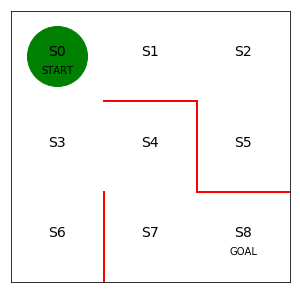

In [6]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [7]:
theta_0 = np.array([[np.nan, 1, 1, np.nan],
                  [np.nan, 1, np.nan, 1],
                  [np.nan, np.nan, 1, 1],
                  [1, 1, 1, np.nan],
                  [np.nan, np.nan, 1, 1],
                  [1, np.nan, np.nan, np.nan],
                  [1, np.nan, np.nan, np.nan],
                  [1, 1, np.nan, np.nan],
                  ])

In [8]:
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    exp_theta = np.exp(beta * theta)
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
    
    pi = np.nan_to_num(pi)
    
    return pi

In [16]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [10]:
def get_action_and_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1
    
    return [action, s_next]

In [11]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while (1):
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
        
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
        
    return s_a_history

In [13]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

[[0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 1], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は52です


In [14]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    
    [m, n] = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
    
    return new_theta

In [17]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49951923 0.50048077 0.        ]
 [0.         0.50192307 0.         0.49807693]
 [0.         0.         0.50048077 0.49951923]
 [0.33376082 0.33311959 0.33311959 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49951923 0.50048077 0.         0.        ]]


In [18]:
stop_epsilon = 10**-4

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.00548986096818721
迷路を解くのにかかったステップ数は256です
0.013025277672184754
迷路を解くのにかかったステップ数は32です
0.031625717218441485
迷路を解くのにかかったステップ数は6です
0.014124317385977692
迷路を解くのにかかったステップ数は24です
0.009898942268196154
迷路を解くのにかかったステップ数は30です
0.009512871259546585
迷路を解くのにかかったステップ数は70です
0.032469183599498075
迷路を解くのにかかったステップ数は6です
0.02062619432531526
迷路を解くのにかかったステップ数は14です
0.01914196677247637
迷路を解くのにかかったステップ数は20です
0.022442643353012215
迷路を解くのにかかったステップ数は18です
0.04769798739386577
迷路を解くのにかかったステップ数は4です
0.03269751586549724
迷路を解くのにかかったステップ数は6です
0.0110094830632112
迷路を解くのにかかったステップ数は40です
0.014171252538793644
迷路を解くのにかかったステップ数は40です
0.03105714244864205
迷路を解くのにかかったステップ数は6です
0.015102630494886471
迷路を解くのにかかったステップ数は62です
0.01955225637324054
迷路を解くのにかかったステップ数は32です
0.030181852727320435
迷路を解くのにかかったステップ数は10です
0.01232552399531106
迷路を解くのにかかったステップ数は34です
0.030695729319124232
迷路を解くのにかかったステップ数は6です
0.011754543663814065
迷路を解くのにかかったステップ数は38です
0.010194688615241199
迷路を解くのにかかったステップ数は54です
0.016275525039423422
迷路を解くのにかかったステップ数は16です
0.010594261786508907
迷路を解く

迷路を解くのにかかったステップ数は12です
0.01624889939269425
迷路を解くのにかかったステップ数は22です
0.014836689697825645
迷路を解くのにかかったステップ数は10です
0.024265117899809813
迷路を解くのにかかったステップ数は6です
0.016590641680147372
迷路を解くのにかかったステップ数は14です
0.023856088933843417
迷路を解くのにかかったステップ数は4です
0.017237130634481707
迷路を解くのにかかったステップ数は8です
0.017556153672246888
迷路を解くのにかかったステップ数は18です
0.01576335292807704
迷路を解くのにかかったステップ数は6です
0.012455190259256704
迷路を解くのにかかったステップ数は10です
0.023371089390067906
迷路を解くのにかかったステップ数は4です
0.02414847216360097
迷路を解くのにかかったステップ数は8です
0.02302833000888818
迷路を解くのにかかったステップ数は4です
0.019717305846590427
迷路を解くのにかかったステップ数は10です
0.018569734239706287
迷路を解くのにかかったステップ数は18です
0.01536514430645644
迷路を解くのにかかったステップ数は6です
0.015082517126907002
迷路を解くのにかかったステップ数は20です
0.013124448120607674
迷路を解くのにかかったステップ数は18です
0.022955035836358773
迷路を解くのにかかったステップ数は4です
0.023082017652713976
迷路を解くのにかかったステップ数は6です
0.013993330166064022
迷路を解くのにかかったステップ数は10です
0.022468262311985926
迷路を解くのにかかったステップ数は4です
0.02213392460237404
迷路を解くのにかかったステップ数は4です
0.01804900737775139
迷路を解くのにかかったステップ数は6です
0.0177216

迷路を解くのにかかったステップ数は4です
0.027480162987986667
迷路を解くのにかかったステップ数は12です
0.011093813417703088
迷路を解くのにかかったステップ数は8です
0.010218923166604457
迷路を解くのにかかったステップ数は6です
0.008090645596915746
迷路を解くのにかかったステップ数は6です
0.010950365345702512
迷路を解くのにかかったステップ数は6です
0.015029354148554525
迷路を解くのにかかったステップ数は6です
0.007112781385479258
迷路を解くのにかかったステップ数は4です
0.008523832326933697
迷路を解くのにかかったステップ数は6です
0.010898025657954225
迷路を解くのにかかったステップ数は6です
0.010238043869390909
迷路を解くのにかかったステップ数は6です
0.007062878951356502
迷路を解くのにかかったステップ数は4です
0.006987403373307999
迷路を解くのにかかったステップ数は4です
0.00691303963576044
迷路を解くのにかかったステップ数は4です
0.006839767762173737
迷路を解くのにかかったステップ数は4です
0.007946676133901792
迷路を解くのにかかったステップ数は6です
0.010031062339927871
迷路を解くのにかかったステップ数は6です
0.007982449642416803
迷路を解くのにかかったステップ数は6です
0.006844754210122081
迷路を解くのにかかったステップ数は4です
0.012950592692124382
迷路を解くのにかかったステップ数は10です
0.008021044881871234
迷路を解くのにかかったステップ数は6です
0.006907810706761344
迷路を解くのにかかったステップ数は4です
0.006834378805960634
迷路を解くのにかかったステップ数は4です
0.007957475833075475
迷路を解くのにかかったステップ数は6です
0.0067878252

0.004534998117710076
迷路を解くのにかかったステップ数は4です
0.006634991078005907
迷路を解くのにかかったステップ数は6です
0.004505216391163656
迷路を解くのにかかったステップ数は4です
0.006887071668379589
迷路を解くのにかかったステップ数は6です
0.008063218270955463
迷路を解くのにかかったステップ数は6です
0.004522592049018823
迷路を解くのにかかったステップ数は4です
0.004479599080218284
迷路を解くのにかかったステップ数は4です
0.007382943630963236
迷路を解くのにかかったステップ数は6です
0.006600639943048117
迷路を解くのにかかったステップ数は6です
0.004446757009666354
迷路を解くのにかかったステップ数は4です
0.00440501147191294
迷路を解くのにかかったステップ数は4です
0.004363836308857574
迷路を解くのにかかったステップ数は4です
0.004323221512195274
迷路を解くのにかかったステップ数は4です
0.01198497125347045
迷路を解くのにかかったステップ数は6です
0.004298511873775855
迷路を解くのにかかったステップ数は4です
0.008655118955601837
迷路を解くのにかかったステップ数は8です
0.00432875090322362
迷路を解くのにかかったステップ数は4です
0.0042886144107736265
迷路を解くのにかかったステップ数は4です
0.004249019942979507
迷路を解くのにかかったステップ数は4です
0.004209958084060592
迷路を解くのにかかったステップ数は4です
0.004171419612488375
迷路を解くのにかかったステップ数は4です
0.004133395496544262
迷路を解くのにかかったステップ数は4です
0.007777355473521631
迷路を解くのにかかったステップ数は6です
0.011478064339150086
迷路を解くのにかかったステップ

迷路を解くのにかかったステップ数は14です
0.0027459575262209074
迷路を解くのにかかったステップ数は4です
0.0027247094052734316
迷路を解くのにかかったステップ数は4です
0.002703706443164533
迷路を解くのにかかったステップ数は4です
0.006458088039621529
迷路を解くのにかかったステップ数は6です
0.00651977385593238
迷路を解くのにかかったステップ数は6です
0.0027695824496102375
迷路を解くのにかかったステップ数は4です
0.0027478122534493055
迷路を解くのにかかったステップ数は4です
0.002726298428544452
迷路を解くのにかかったステップ数は4です
0.0102669579762261
迷路を解くのにかかったステップ数は6です
0.002720866951856124
迷路を解くのにかかったステップ数は4です
0.006494640020171354
迷路を解くのにかかったステップ数は6です
0.007114931189754252
迷路を解くのにかかったステップ数は8です
0.010246550299857195
迷路を解くのにかかったステップ数は8です
0.0028043942273398986
迷路を解くのにかかったステップ数は4です
0.002782331211398495
迷路を解くのにかかったステップ数は4です
0.002760527300080126
迷路を解くのにかかったステップ数は4です
0.010253674091673277
迷路を解くのにかかったステップ数は6です
0.002755909162274299
迷路を解くのにかかったステップ数は4です
0.002734462790245293
迷路を解くのにかかったステップ数は4です
0.0027132652813832495
迷路を解くのにかかったステップ数は4です
0.0026923128309697952
迷路を解くのにかかったステップ数は4です
0.011108086890963535
迷路を解くのにかかったステップ数は8です
0.00272702003268957
迷路を解くのにかかったステップ数は4です
0.0027058

迷路を解くのにかかったステップ数は4です
0.002213237222799244
迷路を解くのにかかったステップ数は4です
0.002197222765554077
迷路を解くのにかかったステップ数は4です
0.008754554432804137
迷路を解くのにかかったステップ数は6です
0.002191833006176973
迷路を解くのにかかったステップ数は4です
0.002176109416519058
迷路を解くのにかかったステップ数は4です
0.0021605571616271496
迷路を解くのにかかったステップ数は4です
0.005782453463377579
迷路を解くのにかかったステップ数は8です
0.005948360404721555
迷路を解くのにかかったステップ数は6です
0.00219384846115811
迷路を解くのにかかったステップ数は4です
0.0021780767502532286
迷路を解くのにかかったステップ数は4です
0.0021624776072877647
迷路を解くのにかかったステップ数は4です
0.008700640330800764
迷路を解くのにかかったステップ数は6です
0.0021579930176580317
迷路を解くのにかかったステップ数は4です
0.020413363759457577
迷路を解くのにかかったステップ数は10です
0.004486380177746101
迷路を解くのにかかったステップ数は6です
0.00216146760307611
迷路を解くのにかかったステップ数は4です
0.004521705515742519
迷路を解くのにかかったステップ数は6です
0.008894519678910598
迷路を解くのにかかったステップ数は8です
0.006782831037334021
迷路を解くのにかかったステップ数は8です
0.0045657853646496604
迷路を解くのにかかったステップ数は6です
0.0022233941160669513
迷路を解くのにかかったステップ数は4です
0.0059840676319130245
迷路を解くのにかかったステップ数は6です
0.0022470086840910217
迷路を解くのにかかったステップ数は4です
0.0022

0.004380720681790649
迷路を解くのにかかったステップ数は6です
0.007695065101003616
迷路を解くのにかかったステップ数は8です
0.0012704151217091675
迷路を解くのにかかったステップ数は4です
0.0012637765551774538
迷路を解くのにかかったステップ数は4です
0.0012571897427652995
迷路を解くのにかかったステップ数は4です
0.0012506541477294297
迷路を解くのにかかったステップ数は4です
0.001244169240268947
迷路を解くのにかかったステップ数は4です
0.0012377344974238078
迷路を解くのにかかったステップ数は4です
0.001231349402965154
迷路を解くのにかかったステップ数は4です
0.001225013447293019
迷路を解くのにかかったステップ数は4です
0.0012187261273347294
迷路を解くのにかかったステップ数は4です
0.0035826046720991364
迷路を解くのにかかったステップ数は6です
0.0012195451015045641
迷路を解くのにかかったステップ数は4です
0.0012133142317206913
迷路を解くのにかかったステップ数は4です
0.001207130796145442
迷路を解くのにかかったステップ数は4です
0.001200994314832421
迷路を解くのにかかったステップ数は4です
0.0011949043138907572
迷路を解くのにかかったステップ数は4です
0.0011888603253942323
迷路を解くのにかかったステップ数は4です
0.0011828618872935515
迷路を解くのにかかったステップ数は4です
0.0011769085433246257
迷路を解くのにかかったステップ数は4です
0.007496773861859762
迷路を解くのにかかったステップ数は6です
0.0011815634944606981
迷路を解くのにかかったステップ数は4です
0.00117562798921899
迷路を解くのにかかったステップ数は4です
0.0011697368623499356

0.0008736305541099283
迷路を解くのにかかったステップ数は4です
0.0008697599740412273
迷路を解くのにかかったステップ数は4です
0.01182719909478783
迷路を解くのにかかったステップ数は8です
0.003092311190264492
迷路を解くのにかかったステップ数は6です
0.0008787501475558436
迷路を解くのにかかったステップ数は4です
0.0008748600551624457
迷路を解くのにかかったステップ数は4です
0.0008709959052947726
迷路を解くのにかかったステップ数は4です
0.0008671574657372616
迷路を解くのにかかったステップ数は4です
0.0008633445068883389
迷路を解くのにかかったステップ数は4です
0.004437928660007931
迷路を解くのにかかったステップ数は8です
0.003129768435173229
迷路を解くのにかかったステップ数は6です
0.00678832298227474
迷路を解くのにかかったステップ数は6です
0.0008924337940558885
迷路を解くのにかかったステップ数は4です
0.0008884592287991128
迷路を解くのにかかったステップ数は4です
0.0008845113003611051
迷路を解くのにかかったステップ数は4です
0.0008805897693848208
迷路を解くのにかかったステップ数は4です
0.0008766943992166223
迷路を解くのにかかったステップ数は4です
0.0008728249558684481
迷路を解くのにかかったステップ数は4です
0.0008689812079831771
迷路を解くのにかかったステップ数は4です
0.0027720601082186075
迷路を解くのにかかったステップ数は6です
0.0008707862128473527
迷路を解くのにかかったステップ数は4です
0.0008669660512316754
迷路を解くのにかかったステップ数は4です
0.0008631710674544893
迷路を解くのにかかったステップ数は4です
0.0008594010392946

0.000732672613936388
迷路を解くのにかかったステップ数は4です
0.000729645648619888
迷路を解くのにかかったステップ数は4です
0.0045233750376356754
迷路を解くのにかかったステップ数は10です
0.0007455788239149642
迷路を解くのにかかったステップ数は4です
0.0007424676732149006
迷路を解くのにかかったステップ数は4です
0.000739376316307775
迷路を解くのにかかったステップ数は4です
0.0007363045825863161
迷路を解くのにかかったステップ数は4です
0.0029320135876132157
迷路を解くのにかかったステップ数は6です
0.0007407030374368927
迷路を解くのにかかったステップ数は4です
0.000737628263186841
迷路を解くのにかかったステップ数は4です
0.000734572915114657
迷路を解くのにかかったステップ数は4です
0.0007315368272359443
迷路を解くのにかかったステップ数は4です
0.0007285198353587999
迷路を解くのにかかったステップ数は4です
0.0007255217770625044
迷路を解くのにかかったステップ数は4です
0.0007225424916711826
迷路を解くのにかかったステップ数は4です
0.0007195818202341275
迷路を解くのにかかったステップ数は4です
0.000716639605502483
迷路を解くのにかかったステップ数は4です
0.0007137156919057343
迷路を解くのにかかったステップ数は4です
0.0007108099255316649
迷路を解くのにかかったステップ数は4です
0.0007079221541054954
迷路を解くのにかかったステップ数は4です
0.0007050522269657529
迷路を解くのにかかったステップ数は4です
0.0007021999950476004
迷路を解くのにかかったステップ数は4です
0.0006993653108603622
迷路を解くのにかかったステップ数は4です
0.00069654802846

0.0004561749254591539
迷路を解くのにかかったステップ数は4です
0.00045469601994886297
迷路を解くのにかかったステップ数は4です
0.0004532243655401974
迷路を解くのにかかったステップ数は4です
0.002393681357553804
迷路を解くのにかかったステップ数は6です
0.0020637700595044356
迷路を解くのにかかったステップ数は6です
0.010776815717757335
迷路を解くのにかかったステップ数は8です
0.00046422702951352465
迷路を解くのにかかったステップ数は4です
0.0004627158531521208
迷路を解くのにかかったステップ数は4です
0.00046121209447927414
迷路を解くのにかかったステップ数は4です
0.0004597157046614085
迷路を解くのにかかったステップ数は4です
0.0024364778649618238
迷路を解くのにかかったステップ数は6です
0.0004644536340649534
迷路を解くのにかかったステップ数は4です
0.0004629405467195258
迷路を解くのにかかったステップ数は4です
0.005709611791610447
迷路を解くのにかかったステップ数は6です
0.0004645873732108882
迷路を解くのにかかったステップ数は4です
0.0004630785183549098
迷路を解くのにかかったステップ数は4です
0.00046157704149293877
迷路を解くのにかかったステップ数は4です
0.0004600828943061644
迷路を解くのにかかったステップ数は4です
0.0004585960288718931
迷路を解くのにかかったステップ数は4です
0.002075320053775795
迷路を解くのにかかったステップ数は6です
0.0004614086400402742
迷路を解くのにかかったステップ数は4です
0.00045991861226200165
迷路を解くのにかかったステップ数は4です
0.00045843581840368866
迷路を解くのにかかったステップ数は4です
0.0004569

0.00033339024968958436
迷路を解くのにかかったステップ数は4です
0.0003324748481114935
迷路を解くのにかかったステップ数は4です
0.0003315632195015246
迷路を解くのにかかったステップ数は4です
0.0003306553430922135
迷路を解くのにかかったステップ数は4です
0.0017808215936701774
迷路を解くのにかかったステップ数は6です
0.0003334626353048535
迷路を解くのにかかったステップ数は4です
0.0003325483409155894
迷路を解くのにかかったステップ数は4です
0.00033163780523545044
迷路を解くのにかかったステップ数は4です
0.00033073100765287217
迷路を解くのにかかったステップ数は4です
0.0003298279276988392
迷路を解くのにかかったステップ数は4です
0.0003289285450418719
迷路を解くのにかかったステップ数は4です
0.00032803283949165915
迷路を解くのにかかったステップ数は4です
0.000327140790994343
迷路を解くのにかかったステップ数は4です
0.00032625237963375756
迷路を解くのにかかったステップ数は4です
0.000325367585629812
迷路を解くのにかかったステップ数は4です
0.0003244863893352608
迷路を解くのにかかったステップ数は4です
0.00032360877123799314
迷路を解くのにかかったステップ数は4です
0.00032273471195633577
迷路を解くのにかかったステップ数は4です
0.0003218641922434172
迷路を解くのにかかったステップ数は4です
0.00032099719297751586
迷路を解くのにかかったステップ数は4です
0.0003201336951706643
迷路を解くのにかかったステップ数は4です
0.00031927367995994785
迷路を解くのにかかったステップ数は4です
0.0003184171286119593
迷路を解くのにかかったステップ数は4です
0.00

0.00025497053668080416
迷路を解くのにかかったステップ数は4です
0.00025435427199399854
迷路を解くのにかかったステップ数は4です
0.0002537402499831927
迷路を解くのにかかったステップ数は4です
0.00025312845971840053
迷路を解くのにかかったステップ数は4です
0.00025251889033961125
迷路を解くのにかかったステップ数は4です
0.00025191153104884775
迷路を解くのにかかったステップ数は4です
0.0002513063711185731
迷路を解くのにかかったステップ数は4です
0.00025070339988271864
迷路を解くのにかかったステップ数は4です
0.0002501026067438898
迷路を解くのにかかったステップ数は4です
0.00024950398116445685
迷路を解くのにかかったステップ数は4です
0.0002489075126758458
迷路を解くのにかかったステップ数は4です
0.00024831319086964995
迷路を解くのにかかったステップ数は4です
0.0002477210054006272
迷路を解くのにかかったステップ数は4です
0.0002471309459876961
迷路を解くのにかかったステップ数は4です
0.0002465430024106638
迷路を解くのにかかったステップ数は4です
0.0002459571645118709
迷路を解くのにかかったステップ数は4です
0.0002453734221931729
迷路を解くのにかかったステップ数は4です
0.00024479176541984324
迷路を解くのにかかったステップ数は4です
0.000244212184214658
迷路を解くのにかかったステップ数は4です
0.00024363466866264907
迷路を解くのにかかったステップ数は4です
0.00024305920890642374
迷路を解くのにかかったステップ数は4です
0.00024248579514921098
迷路を解くのにかかったステップ数は4です
0.00024191441765192626
迷路を解くのにかかったステップ数は4です

迷路を解くのにかかったステップ数は4です
0.00020629931564328588
迷路を解くのにかかったステップ数は4です
0.00020584392267916293
迷路を解くのにかかったステップ数は4です
0.0002053900587280829
迷路を解くのにかかったステップ数は4です
0.0002049377168459269
迷路を解くのにかかったステップ数は4です
0.0002044868901305459
迷路を解くのにかかったステップ数は4です
0.00020403757171784387
迷路を解くのにかかったステップ数は4です
0.00020358975478484628
迷路を解くのにかかったステップ数は4です
0.00020314343254628116
迷路を解くのにかかったステップ数は4です
0.00020269859825630676
迷路を解くのにかかったステップ数は4です
0.00020225524520853938
迷路を解くのにかかったステップ数は4です
0.00020181336673323266
迷路を解くのにかかったステップ数は4です
0.00020137295619833753
迷路を解くのにかかったステップ数は4です
0.00020093400701261602
迷路を解くのにかかったステップ数は4です
0.00020049651261920196
迷路を解くのにかかったステップ数は4です
0.00020006046649978862
迷路を解くのにかかったステップ数は4です
0.00019962586217311257
迷路を解くのにかかったステップ数は4です
0.00019919269319381393
迷路を解くのにかかったステップ数は4です
0.00019876095315489103
迷路を解くのにかかったステップ数は4です
0.0001983306356822187
迷路を解くのにかかったステップ数は4です
0.00019790173444211162
迷路を解くのにかかったステップ数は4です
0.00019747424313272706
迷路を解くのにかかったステップ数は4です
0.005036404192503561
迷路を解くのにかかったステップ数は6です
0.000198609461581

0.00015429303597491208
迷路を解くのにかかったステップ数は4です
0.00015400227167557817
迷路を解くのにかかったステップ数は4です
0.0001537123323943415
迷路を解くのにかかったステップ数は4です
0.00015342321499648044
迷路を解くのにかかったステップ数は4です
0.00015313491636422157
迷路を解くのにかかったステップ数は4です
0.0001528474333921566
迷路を解くのにかかったステップ数は4です
0.0001525607629912825
迷路を解くのにかかったステップ数は4です
0.0001522749020870743
迷路を解くのにかかったステップ数は4です
0.00015198984761861413
迷路を解くのにかかったステップ数は4です
0.00015170559654168608
迷路を解くのにかかったステップ数は4です
0.0001514221458235234
迷路を解くのにかかったステップ数は4です
0.00015113949244828506
迷路を解くのにかかったステップ数は4です
0.0014670957703721479
迷路を解くのにかかったステップ数は6です
0.001507422641465101
迷路を解くのにかかったステップ数は6です
0.00015658461969972164
迷路を解くのにかかったステップ数は4です
0.00015628492157325653
迷路を解くのにかかったステップ数は4です
0.00015598609191827886
迷路を解くのにかかったステップ数は4です
0.0001556881273492728
迷路を解くのにかかったステップ数は4です
0.00015539102449320212
迷路を解くのにかかったステップ数は4です
0.00015509477999700073
迷路を解くのにかかったステップ数は4です
0.0001547993905219973
迷路を解くのにかかったステップ数は4です
0.00015450485274772982
迷路を解くのにかかったステップ数は4です
0.00015421116336809988
迷路を解くのにかかったステップ数は4で

迷路を解くのにかかったステップ数は4です
0.0001274153186591135
迷路を解くのにかかったステップ数は4です
0.00012719503448992142
迷路を解くのにかかったステップ数は4です
0.0001269753289108444
迷路を解くのにかかったステップ数は4です
0.00012675619986672777
迷路を解くのにかかったステップ数は4です
0.00012653764531027172
迷路を解くのにかかったステップ数は4です
0.00012631966320588751
迷路を解くのにかかったステップ数は4です
0.00012610225152458188
迷路を解くのにかかったステップ数は4です
0.0001258854082484065
迷路を解くのにかかったステップ数は4です
0.0001256691313672835
迷路を解くのにかかったステップ数は4です
0.00012545341888038977
迷路を解くのにかかったステップ数は4です
0.00012523826879648307
迷路を解くのにかかったステップ数は4です
0.0001250236791320164
迷路を解くのにかかったステップ数は4です
0.0001248096479137331
迷路を解くのにかかったステップ数は4です
0.00012459617317628693
迷路を解くのにかかったステップ数は4です
0.00012438325296349612
迷路を解くのにかかったステップ数は4です
0.0001241708853272471
迷路を解くのにかかったステップ数は4です
0.00012395906832901767
迷路を解くのにかかったステップ数は4です
0.0014022934588780733
迷路を解くのにかかったステップ数は6です
0.00012637813493777614
迷路を解くのにかかったステップ数は4です
0.0001261592705683809
迷路を解くのにかかったステップ数は4です
0.0001259409843743422
迷路を解くのにかかったステップ数は4です
0.0001257232742809672
迷路を解くのにかかったステップ数は4です
0.00012550613822400088

迷路を解くのにかかったステップ数は4です
0.00010497791270719023
迷路を解くのにかかったステップ数は4です
0.00010481289115077397
迷路を解くのにかかったステップ数は4です
0.00010464826382637106
迷路を解くのにかかったステップ数は4です
0.00010448402945919567
迷路を解くのにかかったステップ数は4です
0.0001043201867812725
迷路を解くのにかかったステップ数は4です
0.000104156734528826
迷路を解くのにかかったステップ数は4です
0.00010399367144361786
迷路を解くのにかかったステップ数は4です
0.00010383099627239017
迷路を解くのにかかったステップ数は4です
0.00010366870776624612
迷路を解くのにかかったステップ数は4です
0.00010350680468427555
迷路を解くのにかかったステップ数は4です
0.0010613706553415873
迷路を解くのにかかったステップ数は6です
0.00010474405289475318
迷路を解くのにかかったステップ数は4です
0.00010457975207677807
迷路を解くのにかかったステップ数は4です
0.00010441584246764779
迷路を解くのにかかったステップ数は4です
0.00010425232280985089
迷路を解くのにかかったステップ数は4です
0.0012762229914858193
迷路を解くのにかかったステップ数は6です
0.00010627355397136405
迷路を解くのにかかったステップ数は4です
0.00010610466211349
迷路を解くのにかかったステップ数は4です
0.004526979188240753
迷路を解くのにかかったステップ数は6です
0.0001070653109340406
迷路を解くのにかかったステップ数は4です
0.0009497418041402236
迷路を解くのにかかったステップ数は6です
0.00010798978888973583
迷路を解くのにかかったステップ数は4です
0.00010781768024386261


In [21]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.013 0.987 0.   ]
 [0.    0.27  0.    0.73 ]
 [0.    0.    0.395 0.605]
 [0.009 0.982 0.009 0.   ]
 [0.    0.    0.985 0.015]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.02  0.98  0.    0.   ]]


In [22]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())